<a href="https://colab.research.google.com/github/Yash-Yelave/Recomendation_systems/blob/main/RS_pr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Upload the dataset file (ensure you have the correct file ready)
data = pd.read_csv('/content/ContextualRecommendationFormResult.csv')

In [5]:
# Fill missing values
data["Would you like to get recommended Holiday Theme Movies On Holidays (Ex : Border on Independence Day and Dangal /Marry Kom on Women's Day) -:"] = data[
    "Would you like to get recommended Holiday Theme Movies On Holidays (Ex : Border on Independence Day and Dangal /Marry Kom on Women's Day) -:"
].fillna(0)

# Display Dataset Information
print(data.head())
print("Dataset Shape:", data.shape)

# Initialize Genres
genre = {"Comedy": 0, "Romance": 0, "Drama": 0, "Sci-Fi": 0, "Action": 0, "Crime And Thriller": 0, "Documentary": 0}

                         Timestamp                 Name  \
0  2020/10/17 12:28:01 AM GMT+5:30     Raj Aryan Sharma   
1  2020/10/17 12:36:16 AM GMT+5:30           Punit Jain   
2  2020/10/17 12:48:16 AM GMT+5:30            Rajneesh    
3  2020/10/17 12:52:18 AM GMT+5:30          Avinash Jha   
4   2020/10/17 1:31:30 AM GMT+5:30  Sankalp Singh Bisht   

  Genre Preference in Morning  -: ( Choose all that apply )  \
0                                             Comedy          
1                               Romance;Comedy;Drama          
2                                      Comedy;Sci-Fi          
3                           Comedy;Drama;Documentary          
4                                             Comedy          

  Genre Preference during Afternoon -: ( Choose all that apply )  \
0                                       Drama;Sci-Fi               
1              Comedy;Crime And Thriller;Documentary               
2                                     Romance;Action          

In [6]:
# Calculate Genre Preferences
for i, j in data.iterrows():
    for k in j[2].split(";"):
        genre[k] += 1

print("Overall Genre Preferences:", genre)


Overall Genre Preferences: {'Comedy': 45, 'Romance': 17, 'Drama': 17, 'Sci-Fi': 20, 'Action': 13, 'Crime And Thriller': 12, 'Documentary': 18}


/tmp/ipython-input-3496508306.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for k in j[2].split(";"):


In [7]:
# Visualization of Genre Preferences in Various Scenarios
def plot_genre_preferences(column_index, title):
    genre = {"Comedy": 0, "Romance": 0, "Drama": 0, "Sci-Fi": 0, "Action": 0, "Crime And Thriller": 0, "Documentary": 0}
    for i, j in data.iterrows():
        for k in j[column_index].split(";"):
            genre[k] += 1
    plt.figure(figsize=(8, 8))
    plt.pie(genre.values(), labels=genre.keys(), autopct='%1.1f%%')
    plt.title(title)
    plt.show()
    print(f"{title}:\n", genre)



/tmp/ipython-input-2952004414.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for k in j[column_index].split(";"):


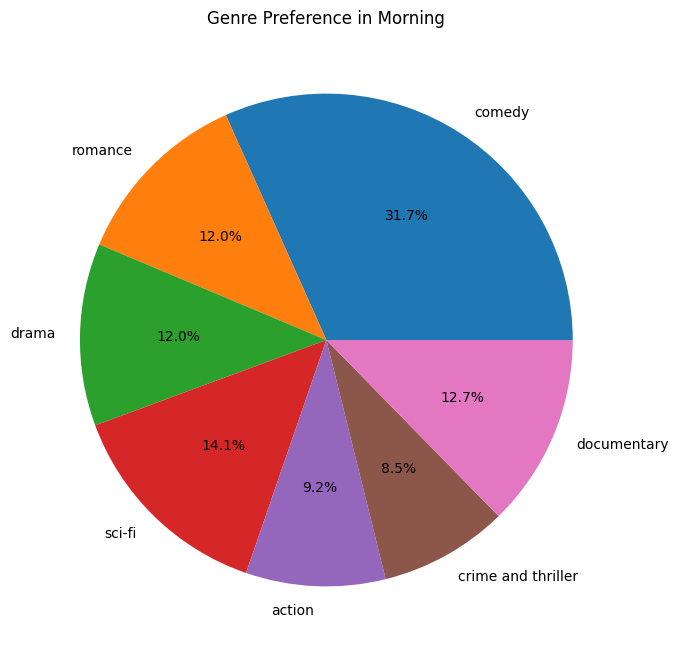

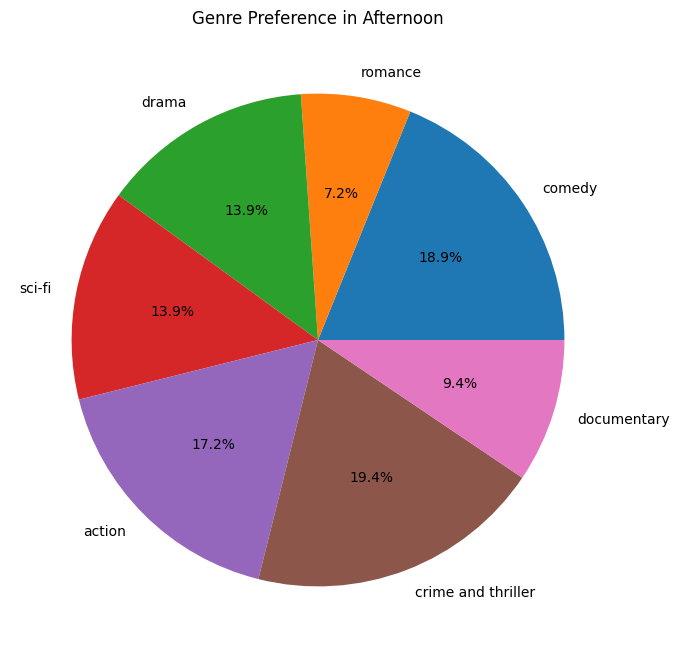

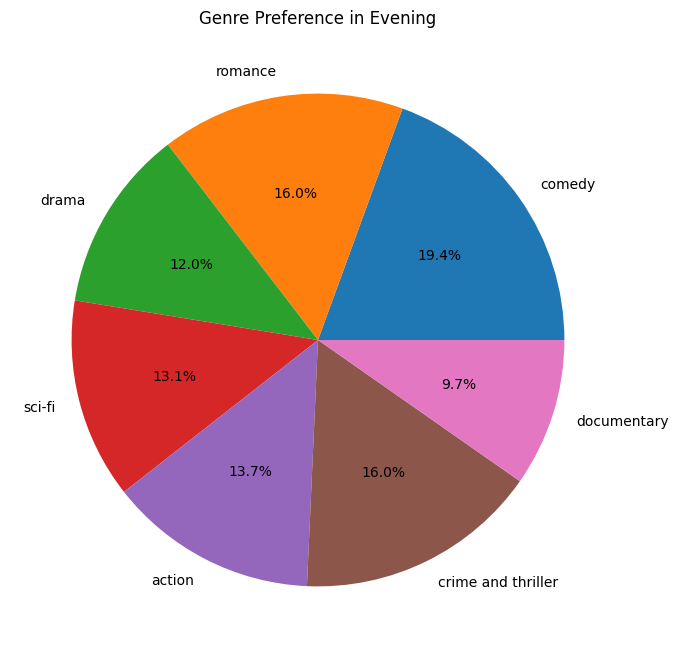

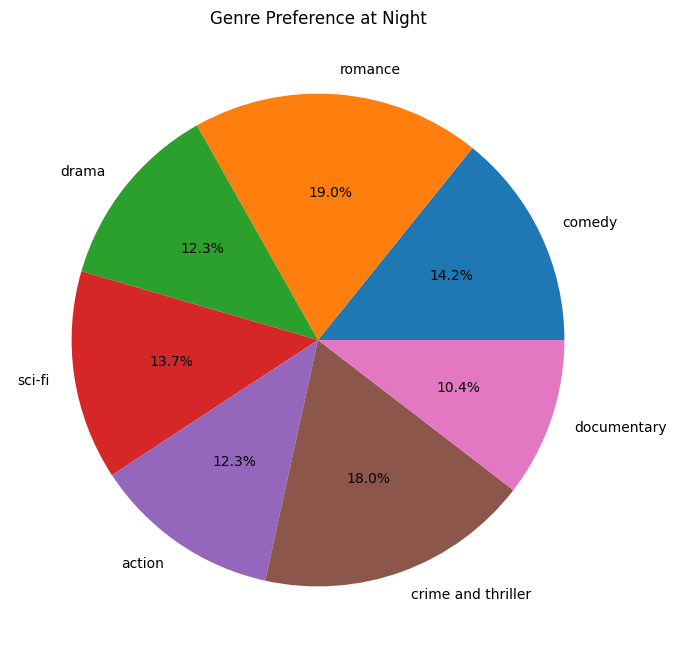

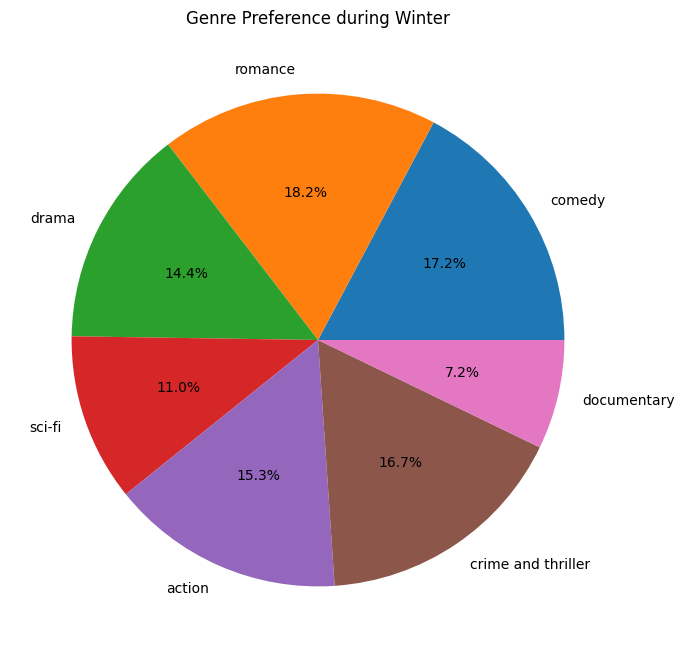

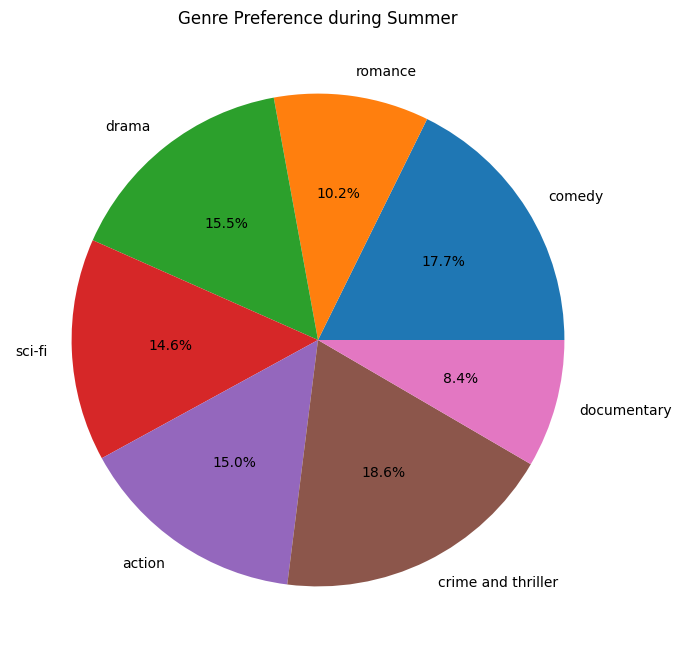

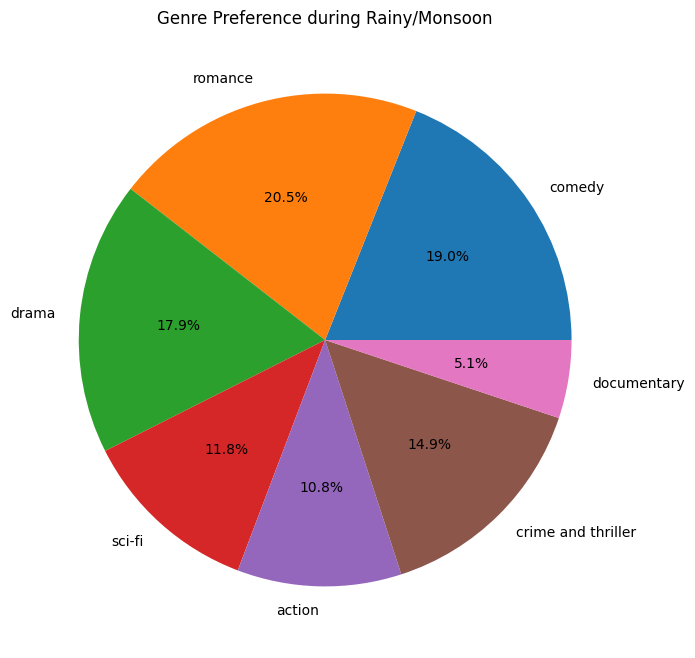

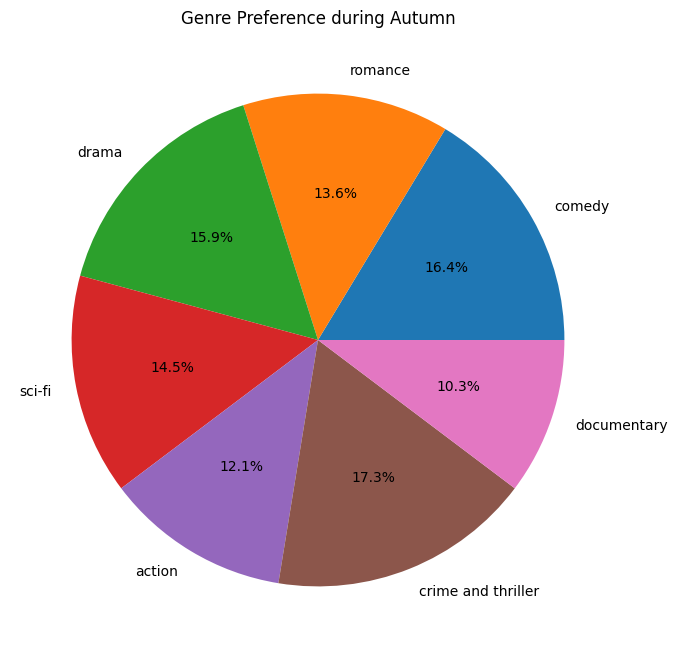

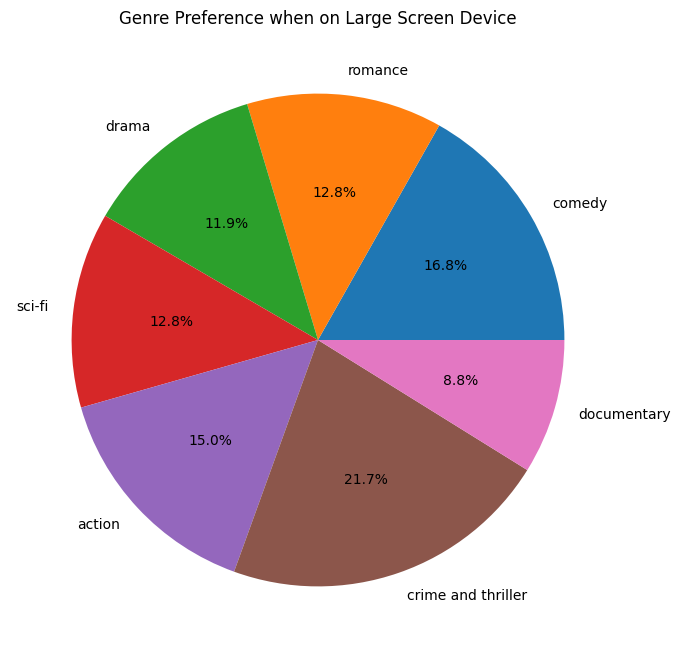

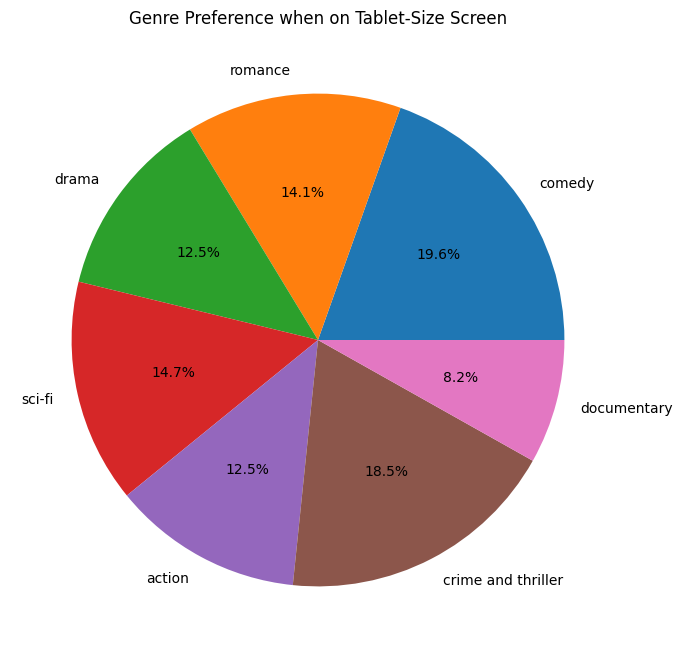

In [8]:
import matplotlib.pyplot as plt

def plot_genre_preferences(column_index, title):
    # Initialize genre dictionary with normalized keys (lowercase)
    genre = {
        "comedy": 0,
        "romance": 0,
        "drama": 0,
        "sci-fi": 0,
        "action": 0,
        "crime and thriller": 0,
        "documentary": 0,
    }
    # Iterate over the rows
    for i, j in data.iterrows():
        # Split genres and normalize each one (convert to lowercase)
        for k in j[column_index].split(";"):
            k_normalized = k.strip().lower()  # Remove leading/trailing spaces and lowercase
            if k_normalized in genre:
                genre[k_normalized] += 1  # Increment the corresponding genre count
            else:
                print(f"Unexpected genre: {k}")  # Optional: Warn for unexpected genres

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(genre.values(), labels=genre.keys(), autopct='%1.1f%%')
    plt.title(title)
    plt.show()

# Usage example for Genre Preferences
# Adjust column indices based on your dataset's structure

# Morning Preferences
plot_genre_preferences(2, "Genre Preference in Morning")

# Afternoon Preferences
plot_genre_preferences(3, "Genre Preference in Afternoon")

# Evening Preferences
plot_genre_preferences(4, "Genre Preference in Evening")

# Night Preferences
plot_genre_preferences(5, "Genre Preference at Night")

# Winter Preferences
plot_genre_preferences(6, "Genre Preference during Winter")

# Summer Preferences
plot_genre_preferences(7, "Genre Preference during Summer")

# Rainy Preferences
plot_genre_preferences(8, "Genre Preference during Rainy/Monsoon")

# Autumn Preferences
plot_genre_preferences(9, "Genre Preference during Autumn")

# Large Screen Preferences
plot_genre_preferences(10, "Genre Preference when on Large Screen Device")

# Tablet Screen Preferences
plot_genre_preferences(11, "Genre Preference when on Tablet-Size Screen")


Dataset Columns: Index(['Timestamp', 'Name',
       'Genre Preference in Morning  -: ( Choose all that apply )',
       'Genre Preference during Afternoon -: ( Choose all that apply )',
       'Genre Preference in Evening -: ( Choose all that apply )',
       'Genre Preference at Night -: ( Choose all that apply )',
       'Genre Preference during Winter -: ( Choose all that apply )',
       'Genre Preference during Summer  -: ( Choose all that apply )',
       'Genre Preference during Rainy/Monsoon  -: ( Choose all that apply )',
       'Genre Preference during Autumn  -: ( Choose all that apply )',
       'Genre Preference on Weekend -: ( Choose all that apply )',
       'Genre Preference on Weekdays -: ( Choose all that apply )',
       'Genre Preference when on Large Screen Device -: ( Choose all that apply )',
       'Genre Preference when on Tablet-Size Screen -: ( Choose all that apply )',
       'Genre Preference when on Phone-Size Screen -: ( Choose all that apply )',
       '

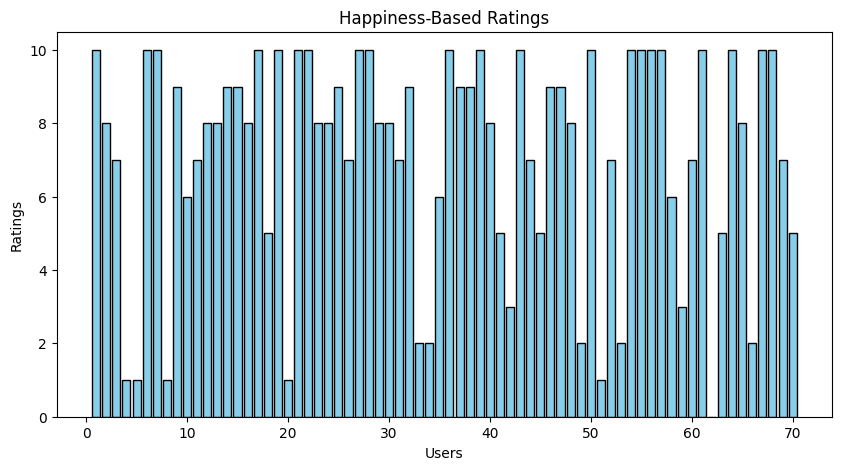

In [9]:


# Column Names and Dataset Shape
print("Dataset Columns:", data.columns)
print("Dataset Shape:", data.shape)

# Calculate Happiness-Based Preferences
x = np.arange(1, len(data) + 1)  # Adjusted to match the number of rows in the dataset
y = [j.iloc[21] for i, j in data.iterrows()]  # Use .iloc for positional indexing

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel('Users')
plt.ylabel('Ratings')
plt.title('Happiness-Based Ratings')
plt.show()


In [10]:
print("Average rating:")
average_rating = statistics.mean(y)
print(average_rating)

if average_rating >= 5:
    print("YES, users would like to get recommended holiday theme movies on holidays.")
else:
    print("NO, users might not prefer holiday theme recommendations.")

Average rating:
7.128571428571429
YES, users would like to get recommended holiday theme movies on holidays.
